# Problem
In this project our task was to solve the TSP problem using self-organizing maps. Our input was 3 files that had the position of cities in it and we had to output the path our algorithm finds. In my report I will explain how my code works and explain it's functions.

# Self-Organizing Maps

***initialization***

The first thing we had to do was initialize our weight list which I did by generating random numbers in the range of the minimum and maximum cities positions.


***overview***

In SOM in each step we have to iterate through all the cities and calculate D for them and also find the minimum result. After finding the city we will update it's weight and also the weight of its neighbors which will be defined with the given radius.

***path***

Finally to find the path we will find the minimum city each time regarding D, and add that city to the end of our path and remove it for our original city list. We will repeat this act until there are no cities left. The Cost of the path will be the distance between 2 adjacent cities that we will calculate using their position.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class SOM:

  def __init__(self, file_name, learning_rate, itter_number):
    self.cities = self.get_file_data(file_name)
    self.alpha = learning_rate
    self.number = len(self.cities)
    self.radius = (self.number-1)//2
    self.weights = np.random.randint(np.array(self.cities).min(), np.array(self.cities).max(), size = (self.number, 2))
    self.D = [0] * self.number
    self.result = []
    self.result_cost = 0
    self.itter_number = itter_number

  def calculate_D(self, city, index):
    d = np.sum(((self.weights-city)**2), axis=1)
    d_min = np.argmin(d)
    if self.D[index] != d_min:
      self.D[index] = d_min
    return d_min
  
  def update_weight(self, city, index):
    for r in range(self.radius):
      self.weights[(index + r) % self.number] = np.dot((1 - self.alpha), self.weights[(index + r) % self.number]) + np.dot(self.alpha, city) 
      self.weights[(index - r) % self.number] = np.dot((1 - self.alpha), self.weights[(index - r) % self.number]) + np.dot(self.alpha, city)


  def get_final_result(self):
    city_list = self.cities.copy()
    n = self.number
    for i in range(self.number):
      d = np.sum(((city_list - np.array([self.weights[i]] * n))**2), axis = 1)
      d_min = np.argmin(d)
      self.result.append(city_list[d_min])
      city_list = np.delete(city_list, d_min, axis=0)
      n -= 1
    self.result = np.array(self.result)
    ans = 0
    for i in range(len(self.result)):
      ans += np.sqrt(np.sum((self.result[i] - self.result[i - 1]) ** 2))
    return ans
  

  def get_file_data(self, file_name):
    f = open(file_name, "r")
    txt = f.readlines()
    city = []
    for line in txt:
      line = [float(j) for j in line.split()]
      city.append(line[1:])
    return city

  def plot(self):
        pl = np.append(self.result, [self.result[0]], axis = 0)
        plt.plot(pl[:, 0], pl[:, 1])
        plt.scatter(pl[:, 0], pl[:, 1], s=40, edgecolor='k')
        plt.show()

  def run_SOM(self):
    for itt in range(self.itter_number):
      for i in range(self.number):
        index = self.calculate_D(city = np.array([self.cities[i]] * self.number), index=i)
        self.update_weight(city=self.cities[i], index=index)
      self.alpha = self.alpha * 0.98
      self.radius = (self.radius-1) if (itt%3 ==0 and self.radius >= 1) else self.radius
    self.result_cost = self.get_final_result()
    print(self.result)
    self.plot()
    print(self.result_cost)





# Parameters

***learning rate***


In SOM learning rate is used to update the weight of the cities and it will be redused in each iteration. Since this rate determines how big a step we take everytime we update our weight, if we set it too high we won't get our optimal answer and if we set it too low it will take too long to reach the optimal answer. Another importent thing is that we have to keep reducing our learning rate in each iteration in order to take smaller and smaller steps the closer we get to our answer. So it takes a couple tries to find the best fit and the ones i found worked for my algorithm


***radius***

In SOM the radius determines the number of neighbours that must be also updated when we are updating our weight. Like the learning rate, this parameter must be reduced in each iteration as well but i found out that if we linearly reduce it, we will get a better answer.

[[1150. 1760.]
 [1260. 1500.]
 [1490. 1630.]
 [1460. 1420.]
 [1840. 1240.]
 [1280. 1200.]
 [1280.  790.]
 [1650.  650.]
 [1040.  950.]
 [ 750.  900.]
 [ 840.  550.]
 [ 490.  500.]
 [ 230.  590.]
 [ 510.  700.]
 [ 460.  860.]
 [ 750. 1100.]
 [ 710. 1310.]
 [ 970. 1340.]
 [ 590. 1390.]
 [ 830. 1770.]
 [ 630. 1660.]
 [ 360. 1980.]
 [  40. 2090.]
 [ 490. 2130.]
 [ 750. 2030.]
 [ 790. 2260.]
 [1170. 2300.]
 [1030. 2070.]
 [1260. 1910.]]


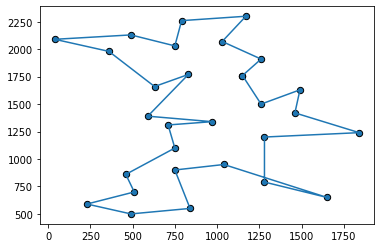

9730.054338589769


In [ ]:
instance = SOM("1.tsp", 0.8, 15000)
instance.run_SOM()

[[ -0.8 148.3]
 [  9.6 137.1]
 [ -6.7 137.7]
 [-42.3 124. ]
 [-78.5 183. ]
 [-74.8 139.8]
 [-43.1  99.9]
 [-72.2 106.7]
 [-74.3  95.5]
 [-92.1  67.3]
 [-74.7  39.2]
 [-49.1  37.6]
 [-44.6  36.9]
 [-50.   23.8]
 [-15.6  48.5]
 [-58.6 -29.9]
 [-77.5 -25.9]
 [-97.1 -70.4]
 [-77.9 -94.7]
 [-62.5 -86.3]
 [-25.2 -53.5]
 [-18.1 -43.6]
 [-27.5 -30. ]
 [ -2.3 -11. ]
 [ 16.4 -22.6]
 [  8.1 -82.9]
 [ 62.1 -42.9]
 [ 71.1 -49.7]
 [ 85.5 -36.7]
 [ 97.  -82.5]
 [ 92.6 -42.2]
 [ 99.7 -38.1]
 [ 98.7  -5.2]
 [ 53.4  -8.2]
 [ 31.9 -11.3]
 [ 30.8  -9.9]
 [ 28.6  15.7]
 [ 34.1  18.2]
 [ 11.8  54. ]
 [ 10.3  68.7]
 [-12.2  92.1]
 [ 39.9  87. ]
 [ 73.7 102.6]
 [ 90.8 101.2]
 [ 58.5 131.9]
 [ 84.6 154.9]
 [ 66.8 194.9]
 [  9.8 195.5]
 [  1.  198.4]
 [ 96.5 100. ]]


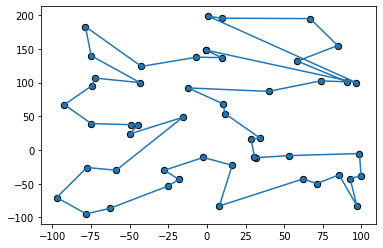

1785.0676711437482


In [ ]:
instance_1 = SOM("2.tsp", 0.8, 200000)
instance_1.run_SOM()

[[ 3.700e+00 -5.400e+00]
 [-1.800e+00  1.400e+01]
 [ 1.130e+01 -9.400e+00]
 [ 1.700e+00  2.560e+01]
 [-2.520e+01 -8.600e+00]
 [-2.440e+01 -1.130e+01]
 [-2.440e+01 -1.740e+01]
 [ 2.780e+01  2.470e+01]
 [-6.800e+00 -4.190e+01]
 [ 3.950e+01 -1.830e+01]
 [-1.550e+01  4.330e+01]
 [-4.060e+01  2.300e+01]
 [-3.750e+01  2.830e+01]
 [-4.590e+01 -1.030e+01]
 [ 4.260e+01 -2.450e+01]
 [ 4.220e+01  2.570e+01]
 [ 3.900e+01  3.240e+01]
 [ 1.530e+01  4.890e+01]
 [ 2.000e+00 -5.140e+01]
 [-5.120e+01 -8.100e+00]
 [-5.680e+01  1.710e+01]
 [ 5.060e+01  3.280e+01]
 [-6.010e+01 -1.310e+01]
 [-5.620e+01 -2.730e+01]
 [ 6.300e+01 -1.950e+01]
 [-3.500e+01  5.660e+01]
 [ 6.890e+01 -1.400e+00]
 [ 6.790e+01  2.170e+01]
 [-3.880e+01  6.060e+01]
 [ 6.460e+01 -3.460e+01]
 [ 1.460e+01 -7.310e+01]
 [-2.740e+01 -6.990e+01]
 [ 4.330e+01 -6.210e+01]
 [ 4.310e+01  6.350e+01]
 [ 6.720e+01  3.860e+01]
 [ 7.450e+01  2.240e+01]
 [-6.450e+01 -4.950e+01]
 [-2.300e+00  8.290e+01]
 [ 7.180e+01 -4.220e+01]
 [-8.430e+01 -6.700e+00]


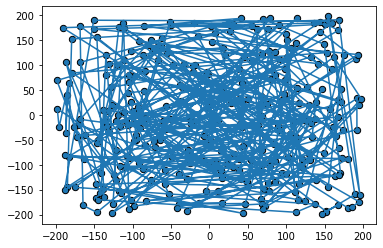

57824.258900891284


In [ ]:
instance_2 = SOM("3.tsp", 0.8, 30000)
instance_2.run_SOM()